In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/loan_sanction.csv")

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             586 non-null    int64  
 1   Married            586 non-null    int64  
 2   Dependents         586 non-null    int64  
 3   Education          586 non-null    int64  
 4   Self_Employed      586 non-null    int64  
 5   ApplicantIncome    586 non-null    int64  
 6   CoapplicantIncome  586 non-null    float64
 7   LoanAmount         586 non-null    float64
 8   Loan_Amount_Term   586 non-null    float64
 9   Credit_History     586 non-null    float64
 10  Property_Area      586 non-null    int64  
 11  Loan_Status        586 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 59.5 KB
None


In [ ]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(df.mean())

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64


<ipython-input-27-f98cceecb4a0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


[[<Axes: title={'center': 'ApplicantIncome'}>
  <Axes: title={'center': 'CoapplicantIncome'}>]
 [<Axes: title={'center': 'LoanAmount'}>
  <Axes: title={'center': 'Loan_Amount_Term'}>]
 [<Axes: title={'center': 'Credit_History'}> <Axes: >]]


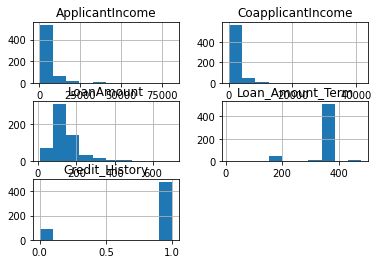

In [ ]:
print(df.hist())

In [ ]:
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#Filled empty credit history fields with the average of 0.84

df.Credit_History = df.Credit_History.fillna(0.84)


In [ ]:
#Filled in empty loan amounts wit the average amount of $146.41

df.LoanAmount = df.LoanAmount.fillna(146.41)

In [ ]:
#Filled self employed with no because that was the vast majority.

df.Self_Employed = df.Self_Employed.fillna("No")


In [ ]:
#Filled the loan amount term with the average of 342

df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(342)


In [ ]:
df.dropna(inplace = True)

[[<Axes: title={'center': 'ApplicantIncome'}>
  <Axes: title={'center': 'CoapplicantIncome'}>]
 [<Axes: title={'center': 'LoanAmount'}>
  <Axes: title={'center': 'Loan_Amount_Term'}>]
 [<Axes: title={'center': 'Credit_History'}> <Axes: >]]


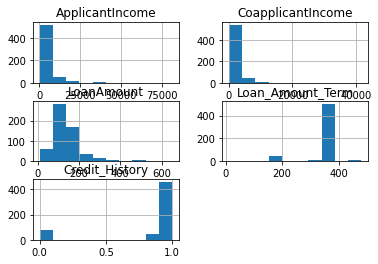

In [ ]:
print(df.hist())

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Decision tree classifier
def decision_tree_classifier(train_x, train_y):
  from sklearn import tree
  model = tree.DecisionTreeClassifier()
  model.fit(train_x, train_y)
  return model


In [ ]:
#KNN Classifier
def knn_classifier(train_x, train_y):
  from sklearn.neighbors import KNeighborsClassifier
  model = KNeighborsClassifier()
  model.fit(train_x,train_y)
  return model

In [ ]:
#Naive Bayes Classifier
def naive_bayes_classifier(train_x, train_y):
  from sklearn.naive_bayes import MultinomialNB
  model = MultinomialNB(alpha = 0.01)
  model.fit(train_x, train_y)
  return model

In [ ]:
#Logistic Regression Classifier
def logistic_regression_classifier(train_x, train_y):
  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(penalty = 'l2')
  model.fit(train_x, train_y)
  return model

In [ ]:
#Gradient Boosting Classifier
def Gradient_Boosting_Classifier(train_x, train_y):
  from sklearn.ensemble import GradientBoostingClassifier
  model = GradientBoostingClassifier()
  model.fit(train_x, train_y)
  return model

In [ ]:
#SVM Classifier
def svm_classifier(train_x, train_y):
  from sklearn.svm import SVC
  model = SVC(kernel = 'rbf', probability= True)
  model.fit(train_x, train_y)
  return model

In [ ]:
# Random Forest Classifier
def random_forest_classifier(train_x, train_y):
  from sklearn.ensemble import RandomForestClassifier
  model = RandomForestClassifier(n_estimators= 100)
  model.fit(train_x, train_y)
  return model

In [ ]:
#import for ANN
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import callbacks
from keras.optimizers import Adam

In [ ]:
y_train[:100]

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
df = df.drop('Loan_ID', axis = 1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             586 non-null    object 
 1   Married            586 non-null    object 
 2   Dependents         586 non-null    object 
 3   Education          586 non-null    object 
 4   Self_Employed      586 non-null    object 
 5   ApplicantIncome    586 non-null    int64  
 6   CoapplicantIncome  586 non-null    float64
 7   LoanAmount         586 non-null    float64
 8   Loan_Amount_Term   586 non-null    float64
 9   Credit_History     586 non-null    float64
 10  Property_Area      586 non-null    object 
 11  Loan_Status        586 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 59.5+ KB
None


In [ ]:
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Gender = le.fit_transform(df.Gender)
Gender
df.Gender = Gender

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Married = le.fit_transform(df.Married)
Married
df.Married = Married

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Dependents = le.fit_transform(df.Dependents)
Dependents
df.Dependents = Dependents

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Education = le.fit_transform(df.Education)
Education
df.Education = Education

In [ ]:
from pandas.core.algorithms import SelectNFrame
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Self_Employed = le.fit_transform(df.Self_Employed)
Self_Employed
df.Self_Employed = Self_Employed

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Property_Area = le.fit_transform(df.Property_Area)
Property_Area
df.Property_Area = Property_Area

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Loan_Status = le.fit_transform(df.Loan_Status)
Loan_Status
df.Loan_Status = Loan_Status

In [ ]:
#Splitting training and test set
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 42)

In [ ]:
print(df.head)

<bound method NDFrame.head of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncom

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:

test_classifiers = [
    'KNN',
    'DT',
    'NB',
    'LR',
    'RF',
    'SVM',
    'GBDT'
]
classifiers = {
    'KNN':knn_classifier,
    'DT':decision_tree_classifier,
    'NB':naive_bayes_classifier,
    'LR':logistic_regression_classifier,
    'RF':random_forest_classifier,
    'SVM':svm_classifier,
    'GBDT':Gradient_Boosting_Classifier

}

In [ ]:
print(X_train)

[[0.         1.         0.         ... 0.74358974 1.         0.        ]
 [1.         0.         0.         ... 0.74358974 1.         0.        ]
 [1.         1.         1.         ... 0.61538462 0.         0.5       ]
 ...
 [0.         1.         0.         ... 0.74358974 0.84       0.        ]
 [1.         1.         0.         ... 0.35897436 0.         0.        ]
 [1.         1.         0.33333333 ... 0.74358974 1.         1.        ]]


In [ ]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
for classifier in test_classifiers:
  print('***************** %s *************' % classifier)

  model = classifiers[classifier](X_train, y_train)

  predict = model.predict(X_test)
  train_out = model.predict(X_train)

  matrix = confusion_matrix(y_test, predict)
  print(matrix)
  class_report = classification_report(y_test, predict)
  print(class_report)

***************** KNN *************
[[15 28]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        43
           1       0.72      0.97      0.83        75

    accuracy                           0.75       118
   macro avg       0.80      0.66      0.66       118
weighted avg       0.78      0.75      0.71       118

***************** DT *************
[[19 24]
 [19 56]]
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        43
           1       0.70      0.75      0.72        75

    accuracy                           0.64       118
   macro avg       0.60      0.59      0.60       118
weighted avg       0.63      0.64      0.63       118

***************** NB *************
[[ 0 43]
 [ 0 75]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.64      1.00      0.78        75

    accuracy       

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Early stopping for ANN
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  #Minimum amount of change to count as improvement
    patience = 20,  # how many epochs to wait before stopping
    restore_best_weights=True
)

#initializing the NN
model = Sequential()

#layers

model.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11 ))

model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer='uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Compiling the ANN
opt = Adam(learning_rate = 0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks = [early_stopping], validation_split = 0.2)

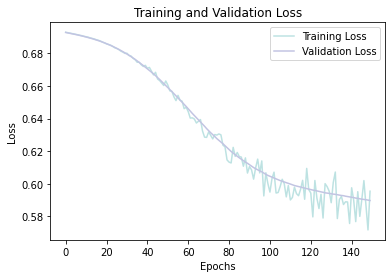

In [ ]:
# Plotting training and validation loss

history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']], "#BDE2E2", label = "Training Loss")
plt.plot(history_df.loc[:, ['val_loss']], "#C2C4E2", label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)

4/4 [==============================] - 0s 4ms/step
[[ 0 43]
 [ 0 75]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.64      1.00      0.78        75

    accuracy                           0.64       118
   macro avg       0.32      0.50      0.39       118
weighted avg       0.40      0.64      0.49       118

